In [100]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [101]:
iris = load_iris()
X = iris.data
y = iris.target

In [102]:
target_virginica = (y==2).astype(int)

# Рассчитываем количество объектов каждого класса по новой целевой переменной target_virginica
print("Количество объектов класса 0 (не Virginica):", np.sum(target_virginica == 0))
print("Количество объектов класса 1 (Virginica):", np.sum(target_virginica == 1))

Количество объектов класса 0 (не Virginica): 100
Количество объектов класса 1 (Virginica): 50


In [103]:
features_train, features_test, target_train, target_test = train_test_split(X, target_virginica, test_size=0.3, random_state=2)

model = LogisticRegression()
model.fit(features_train, target_train)

LogisticRegression()

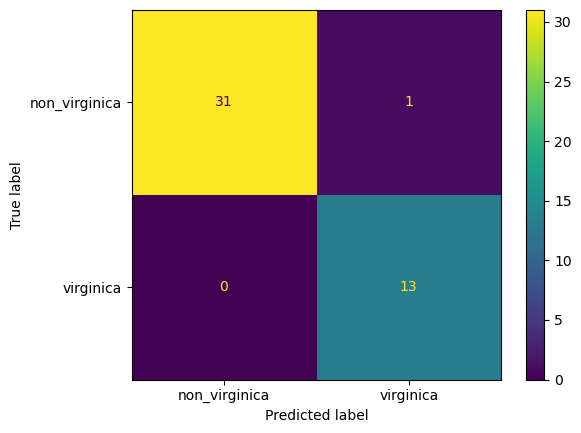

In [104]:
ConfusionMatrixDisplay(confusion_matrix(target_test, model.predict(features_test)), display_labels=['non_virginica', 'virginica']).plot()

In [105]:
class MyLogisticRegression:
    def __init__(self, step_size, iterations):
        self.step_size = step_size
        self.iterations = iterations
        self.w = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)        
        self.w = np.zeros(X.shape[1])
        
        for _ in range(self.iterations):
            gradient = X.T @ (self.sigmoid(X @ self.w) - y) / y.size
            self.w -= self.step_size * gradient
    
    def predict(self, X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return ((self.sigmoid(X @ self.w)) >= 0.5).astype(int)

In [106]:
myModel = MyLogisticRegression(0.05, 10000)
myModel.fit(features_train, target_train)

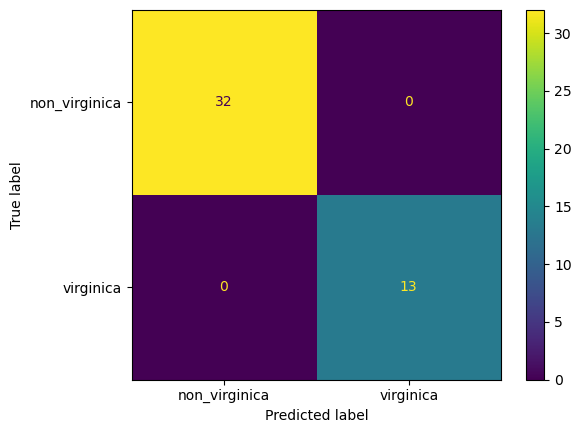

In [107]:
ConfusionMatrixDisplay(confusion_matrix(target_test, myModel.predict(features_test)), display_labels=['non_virginica', 'virginica']).plot()